In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from data_util import load_image, get_patch
from generators import PatchSequence
from sklearn.model_selection import KFold
import pandas as pd

Using TensorFlow backend.


In [2]:
# Define a function to plot a batch or list of image patches in a grid
def plot_image(images, images_per_row = 8):
    
    fig, axs = plt.subplots(int(np.ceil(len(images)/images_per_row)), images_per_row)
        
    c = 0
    for ax_row in axs:
        for ax in ax_row:
            if c < len(images):
                ax.imshow(images[c], cmap='gray')
            ax.axis('off')      
            c += 1
    plt.show()

------------------------------------------

Fold 1

PatchSequence detected: 239 patch samples.
PatchSequence detected: 59 patch samples.


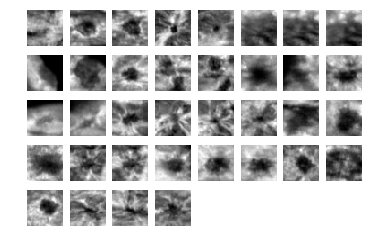

36 cysts validation cases
------------------------------------------

Fold 2

PatchSequence detected: 241 patch samples.
PatchSequence detected: 57 patch samples.


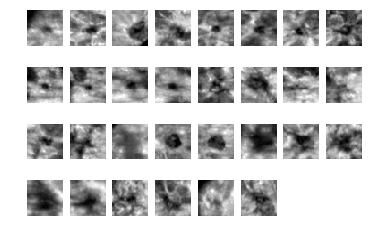

30 cysts validation cases
------------------------------------------

Fold 3

PatchSequence detected: 229 patch samples.
PatchSequence detected: 69 patch samples.


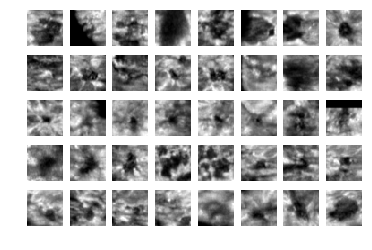

40 cysts validation cases
------------------------------------------

Fold 4

PatchSequence detected: 251 patch samples.
PatchSequence detected: 47 patch samples.


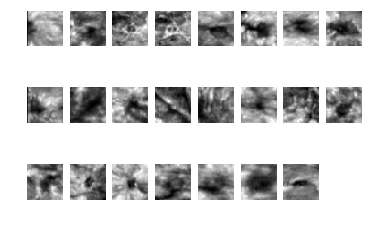

23 cysts validation cases
------------------------------------------

Fold 5

PatchSequence detected: 232 patch samples.
PatchSequence detected: 66 patch samples.


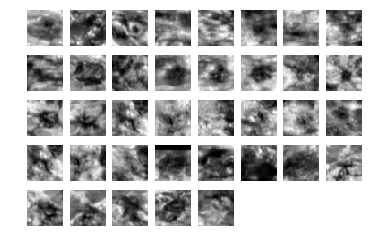

37 cysts validation cases


In [3]:
data_dir = '/projects/0/ismi2018/FINALPROJECTS/BREAST_3D_ULTRASOUND/shareWithStudents/'
train_csv = pd.read_csv(data_dir + 'trainingSet.csv', dtype=str)

unique_patients = train_csv['patientID'].unique()

kf = KFold(5, random_state=42, shuffle=True)
folds = list(kf.split(unique_patients))

for i in range(len(folds)):
    print("------------------------------------------\n")
    print("Fold {}\n".format(i + 1))
    train_patients, test_patients = folds[i]
    train_rows = train_csv[train_csv['patientID'].isin(unique_patients[train_patients])]
    test_rows = train_csv[train_csv['patientID'].isin(unique_patients[test_patients])]
    
    train_seq = PatchSequence(data_dir, train_rows, 30)
    val_seq = PatchSequence(data_dir, test_rows, 30)

    cysts_counter = 0
    cysts_toplot = []
    for i in range(len(val_seq)):
        batch_x, batch_y = val_seq[i]
        for j in range(batch_x.shape[0]):
            if np.all(batch_y[j] == np.array([1, 0, 0])):
                cysts_counter += 1
                cysts_toplot.append(np.squeeze(batch_x[j, :, :, 20]))
#                 plt.figure()
#                 plt.imshow(np.squeeze(batch_x[j, :, :, 20]), cmap='gray')
#                 plt.show()
    
    plot_image(cysts_toplot)
    print("{} cysts validation cases".format(cysts_counter))